In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 25)

# Pawpulation Forecast EDA

This notebook contains exploratory data analysis and feature engineering for the [Animal Shelter Intake and Outcome datset](https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw/about_data) provided by the County of Sonoma Department of Health Services which will be used for training predictive algorithms as part of the Pawpulation Forecast MIDS capstone project.

### Load Data and Initial Exploration

In [2]:
df = pd.read_csv("../Data/Animal_Shelter_Intake_and_Outcome_20240517.csv")

# Replace spaces in column names with underscores for ease of use
df.columns = df.columns.str.replace(" ", "_")

In [3]:
df.head(10)

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K24-047892,EUTH,A425283,03/16/2024,03/24/2024,8,QUARANTINE,OVER THE COUNTER,TRANSFER,LAB FRA,UNKNOWN,DEAD,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,12/04/2023,01/08/2024,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
2,PINTO,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,07/27/2016,K19-032986,DA35,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
3,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,11/28/2023,01/08/2024,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
4,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,11/11/2021,K23-046766,DS80,A422038,11/11/2023,01/08/2024,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
5,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,06/08/2021,K24-047284,DS68,A423685,01/05/2024,01/08/2024,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"93927(36.32153, -121.24627)",1
6,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K24-047994,EUTH,A425478,03/24/2024,03/25/2024,1,QUARANTINE,FIELD,DISPOSAL,FRA,UNKNOWN,DEAD,COUNTY,NaN,NaN,NaN,1
7,REMI,DOG,RHOD RIDGEBACK/MIX,BROWN,Female,LARGE,NaN,K24-047957,DQ110,A425261,03/19/2024,03/25/2024,6,OWNER SURRENDER,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,OUT OF COUNTY,NaN,NaN,NaN,1
8,NaN,DOG,PIT BULL/MIX,RED/WHITE,Female,MED,NaN,K24-047828,DQ108,A425186,03/13/2024,03/25/2024,12,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
9,NaN,OTHER,RABBIT SH,WHITE,Male,SMALL,NaN,K24-047985,CS06,A425471,03/23/2024,NaN,0,STRAY,FLD_STRAY,NaN,NaN,UNKNOWN,NaN,SANTA ROSA,NaN,NaN,NaN,1


In [4]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27839 entries, 0 to 27838
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  20522 non-null  object 
 1   Type                  27839 non-null  object 
 2   Breed                 27839 non-null  object 
 3   Color                 27839 non-null  object 
 4   Sex                   27839 non-null  object 
 5   Size                  27803 non-null  object 
 6   Date_Of_Birth         21017 non-null  object 
 7   Impound_Number        27839 non-null  object 
 8   Kennel_Number         27829 non-null  object 
 9   Animal_ID             27839 non-null  object 
 10  Intake_Date           27839 non-null  object 
 11  Outcome_Date          27583 non-null  object 
 12  Days_in_Shelter       27839 non-null  int64  
 13  Intake_Type           27839 non-null  object 
 14  Intake_Subtype        27839 non-null  object 
 15  Outcome_Type       

In [6]:
df.isna().sum()

Name                    7317
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      36
Date_Of_Birth           6822
Impound_Number             0
Kennel_Number             10
Animal_ID                  0
Intake_Date                0
Outcome_Date             256
Days_in_Shelter            0
Intake_Type                0
Intake_Subtype             0
Outcome_Type             262
Outcome_Subtype          594
Intake_Condition           0
Outcome_Condition        616
Intake_Jurisdiction        0
Outcome_Jurisdiction    4005
Outcome_Zip_Code        4027
Location                4027
Count                      0
dtype: int64

### Name
It isn't clear whether the `Name` column indicates an animal has a name upon intake, or indicates whether the animal has a name at any point in its shelter stay. An animal shelter could give a name to an animal as part of putting the animal up for adoption. The `Name` column is likely the least useful in terms of predicting how long an animal will be in the animal shelter. Though the fact that an animal has a name could be a strong indicator that the animal is cared for and may, for example, just be temporarily lost and will soon return to an owner. Perhaps a `Has_Name` column could be more useful.

In [7]:
df.Name.isna().sum()

7317

In [8]:
df.Name.value_counts()

Name
BUDDY                153
LUNA                 141
BELLA                131
MAX                  109
LUCY                 103
                    ... 
HAGAN                  1
*GUMBI                 1
*GERTRUDE              1
PRINCESS ALLSTOCK      1
QUINTUS                1
Name: count, Length: 7309, dtype: int64

In [9]:
df["Has_Name"] = df.Name.notna()

<Axes: >

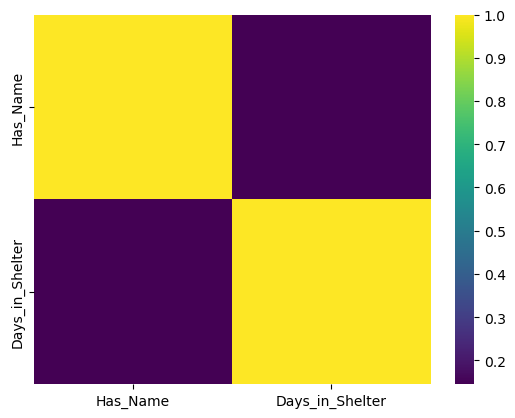

In [10]:
sns.heatmap(df[["Has_Name", "Days_in_Shelter"]].corr(), cmap="viridis")

### Type

`Type` is just a categorical variable indicating whether an animal is a cat or a dog. Nothing too insightful here.

In [11]:
df.Type.isna().sum()

0

In [12]:
df.Type.value_counts()

Type
DOG      15691
CAT       9821
OTHER     2327
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Length of Stay by Animal Type')

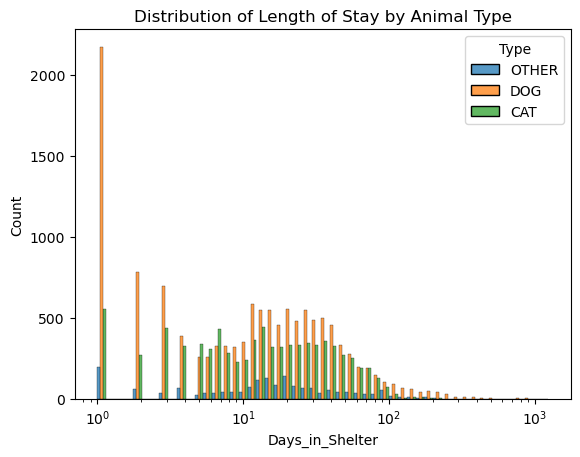

In [13]:
sns.histplot(data=df, x="Days_in_Shelter", hue="Type", log_scale=True, multiple="dodge")

plt.title("Distribution of Length of Stay by Animal Type")

### Breed

Breed likely correlates strongly with length of stay in a shelter because some breeds are more in demand than others. However, there are likely a large number of breeds in this dataset. The animal breeds for the "OTHER" animal types seem beyond the scope of our project. We'll drop them in the final cleaned dataset.

In [14]:
df.Breed.isna().sum()

0

In [15]:
# Number of unique breeds by type of animal
df.groupby("Type").Breed.nunique()

Type
CAT       58
DOG      884
OTHER    140
Name: Breed, dtype: int64

In [16]:
df[df.Type.eq("CAT")].Breed.unique()

array(['DOMESTIC MH', 'DOMESTIC SH', 'DOMESTIC LH', 'DOMESTIC SH/MIX',
       'SIAMESE', 'BENGAL/AMER CURL SH', 'SIAMESE/MIX',
       'JAPAN BOBTAIL/MIX', 'SNOWSHOE', 'MAINE COON/MIX', 'HIMALAYAN',
       'MANX', 'SNOWSHOE/MIX', 'ABYSSINIAN', 'PERSIAN/MIX', 'BENGAL',
       'BENGAL/DOMESTIC SH', 'HIMALAYAN/PERSIAN',
       'ABYSSINIAN/DOMESTIC SH', 'DOMESTIC LH/MIX', 'MANX/MIX',
       'BALINESE/JAVANESE', 'TURKISH ANGORA', 'SAVANNAH', 'BALINESE',
       'PERSIAN', 'SCOTTISH FOLD/MIX', 'SCOTTISH FOLD', 'RUSSIAN BLUE',
       'DOMESTIC SH/ABYSSINIAN', 'DOMESTIC LH/MAINE COON', 'BENGAL/MIX',
       'MUNCHKIN SH', 'HIMALAYAN/MIX', 'DOMESTIC LH/MANX',
       'DOMESTIC MH/MIX', 'BURMESE', 'EGYPTIAN MAU/MIX',
       'DOMESTIC LH/SIAMESE', 'MAINE COON', 'TURKISH VAN/MIX',
       'DOMESTIC SH/MAINE COON', 'SIAMESE/DOMESTIC LH', 'BRITISH SH',
       'EXOTIC SH', 'SIAMESE/MANX', 'TURKISH VAN', 'SIAMESE/DOMESTIC SH',
       'ABYSSINIAN/MIX', 'BURMESE/MIX', 'DOMESTIC MH/DOMESTIC LH',
       'SPHYN

In [17]:
df[df.Type.eq("DOG")].Breed.unique()

array(['SIBERIAN HUSKY', 'PIT BULL', 'GERM SHEPHERD',
       'RHOD RIDGEBACK/MIX', 'PIT BULL/MIX', 'SHIH TZU',
       'PARSON RUSS TER/CHIHUAHUA SH', 'SCHNAUZER MIN/WELSH TERRIER',
       'SCHNAUZER MIN', 'GERM SHEPHERD/MIX', 'AUST CATTLE DOG',
       'LABRADOR RETR/GERM SHEPHERD', 'CHIHUAHUA SH', 'FRENCH BULLDOG',
       'CHIHUAHUA SH/PARSON RUSS TER', 'LABRADOR RETR',
       'AUST CATTLE DOG/LABRADOR RETR', 'PIT BULL/BULLMASTIFF',
       'BORDER COLLIE', 'PARSON RUSS TER/MIX', 'ROTTWEILER/MIX',
       'SIBERIAN HUSKY/GERM SHEPHERD', 'GERM SHEPHERD/SIBERIAN HUSKY',
       'STAFFORDSHIRE', 'MALTESE', 'CATAHOULA/MIX', 'POMERANIAN',
       'SIBERIAN HUSKY/MIX', 'CHIHUAHUA SH/PUG', 'LABRADOR RETR/MIX',
       'PUG/MIX', 'PIT BULL/LABRADOR RETR', 'BULLMASTIFF/PIT BULL',
       'AKITA', 'DOBERMAN PINSCH', 'CHIHUAHUA LH/MIX',
       'GERM SHEPHERD/PIT BULL', 'BELG MALINOIS/MIX',
       'LABRADOR RETR/ROTTWEILER', 'ALASKAN HUSKY', 'PARSON RUSS TER',
       'TR WALKER HOUND/MIX', 'POMERANIAN/M

In [18]:
df[df.Type.eq("OTHER")].Breed.unique()

array(['BAT', 'RABBIT SH', 'PIGEON', 'CHICKEN', 'GUINEA PIG', 'PEAFOWL',
       'HORSE', 'AMERICAN', 'BAT/MEX FREE-TAIL', 'ANGORA-ENGLISH/MIX',
       'RAT', 'TURTLE', 'MACAW', 'GOAT', 'GOAT/PYGMY', 'HAVANA/MIX',
       'PARAKEET', 'COCKATOO', 'ARAUCANA', 'LIZARD', 'MOUSE',
       'RABBIT LH/MIX', 'LOP-ENGLISH', 'RACCOON', 'SHEEP', 'HAMSTER',
       'ENGLISH SPOT/MIX', 'PIG', 'DONKEY', 'GOOSE', 'DUCK',
       'AMERICAN SABLE/MIX', 'COCKATIEL', 'GOAT/LA MANCHA', 'DOVE',
       'CANARY', 'KOI', 'HARLEQUIN/MIX', 'CALIFORNIAN/MIX', 'FINCH',
       'DUCK/CAYUGA', 'COLD WATER', 'HOTOT', 'ANGORA-SATIN', 'PALOMINO',
       'PALOMINO/MIX', 'LOP-AMER FUZZY', 'PAINT', 'SILKIE',
       'ENGLISH SPOT', 'LOP-ENGLISH/MIX', 'REX/MIX', 'POTBELLY PIG',
       'FERRET', 'PARROT', 'SILVER/MIX', 'LILAC', 'OPOSSUM', 'LOP-MINI',
       'REX', 'LOP-HOLLAND/MIX', 'ANGUS', 'HAVANA', 'RHINELANDER/MIX',
       'SNAKE/RATTLE', 'RHODE ISLAND', 'GOAT/BOER', 'CALIFORNIAN',
       'AMERICAN/MIX', 'LOP-FRENCH', 'GOAT/N

/var/folders/nx/vg47_qrn641gstht6xwh61yh0000gn/T/ipykernel_32676/3018433087.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")


Text(0.5, 1.0, '10 Mosts Common Cat Breeds')

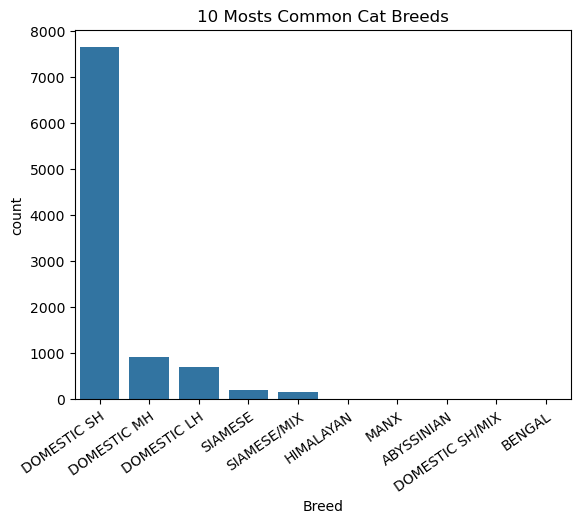

In [19]:
barplot = sns.barplot(df[df.Type.eq("CAT")].Breed.value_counts()[:10])

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
plt.title("10 Mosts Common Cat Breeds")

/var/folders/nx/vg47_qrn641gstht6xwh61yh0000gn/T/ipykernel_32676/3198522100.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")


Text(0.5, 1.0, '10 Mosts Common Dog Breeds')

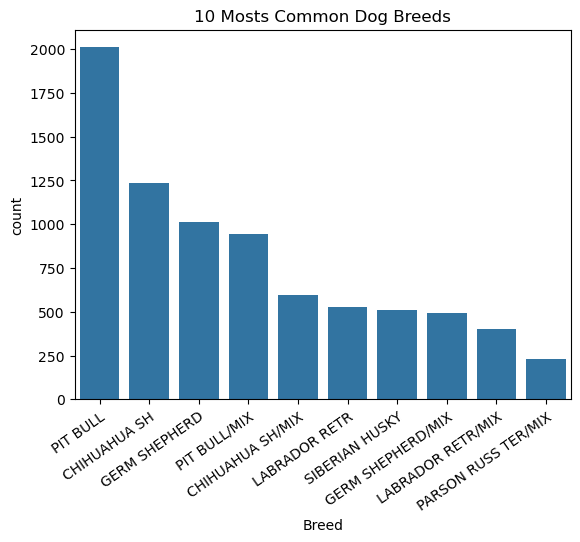

In [20]:
barplot = sns.barplot(df[df.Type.eq("DOG")].Breed.value_counts()[:10])

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
plt.title("10 Mosts Common Dog Breeds")

### Color

In [21]:
df.Color.isna().sum()

0

In [22]:
# Number of unique colors by type of animal
df.groupby("Type").Color.nunique()

Type
CAT      170
DOG      212
OTHER    104
Name: Color, dtype: int64

/var/folders/nx/vg47_qrn641gstht6xwh61yh0000gn/T/ipykernel_32676/2015143301.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")


Text(0.5, 1.0, '10 Mosts Common Cat Colors')

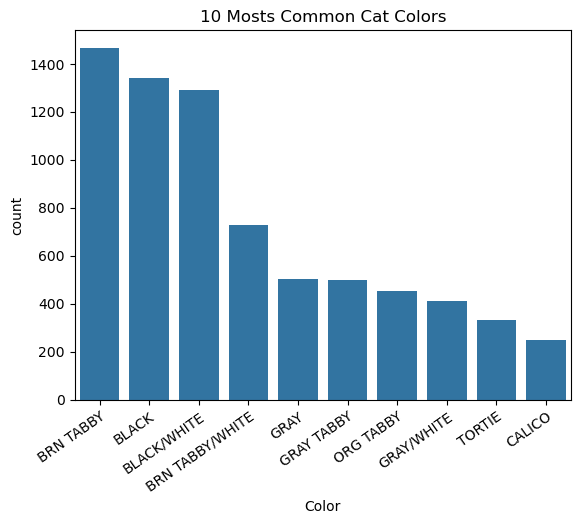

In [23]:
barplot = sns.barplot(df[df.Type.eq("CAT")].Color.value_counts()[:10])

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
plt.title("10 Mosts Common Cat Colors")

/var/folders/nx/vg47_qrn641gstht6xwh61yh0000gn/T/ipykernel_32676/3904994655.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")


Text(0.5, 1.0, '10 Mosts Common Dog Colors')

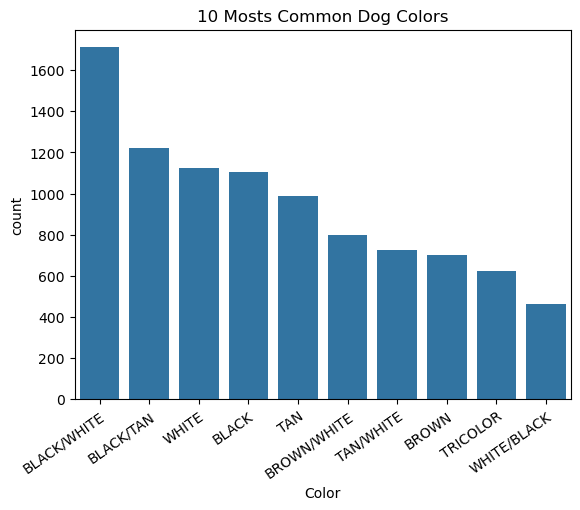

In [24]:
barplot = sns.barplot(df[df.Type.eq("DOG")].Color.value_counts()[:10])

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
plt.title("10 Mosts Common Dog Colors")

In [25]:
# Days in shelter by color
# The precision of the numbers below seem to indicate that these are probably singular cases
df[df.Type.eq("CAT")].groupby("Color").Days_in_Shelter.mean().sort_values(ascending=False)

Color
BLK SMOKE/WHITE     89.666667
BRN TABBY/GRAY      67.000000
GRAY/BLUE CREAM     63.000000
AGOUTI/BRN TABBY    55.000000
BRN TIGER/WHITE     53.000000
                      ...    
BUFF/GRAY TABBY      0.000000
CREAM/BLACK          0.000000
CREAM/BRN TABBY      0.000000
RED                  0.000000
BROWN/GRAY           0.000000
Name: Days_in_Shelter, Length: 170, dtype: float64

In [26]:
# Days in shelter by color
# The precision of the numbers below seem to indicate that these are probably singular cases
df[df.Type.eq("DOG")].groupby("Color").Days_in_Shelter.mean().sort_values(ascending=False)

Color
BROWN/TRICOLOR          241.0
TAN/CREAM                90.0
YELLOW/TAN               88.0
RED MERLE/BLUE MERLE     86.0
BLACK/CHOCOLATE          81.0
                        ...  
GRAY/GOLD                 0.0
ORANGE/BLACK              0.0
RED/GOLD                  0.0
SILVER/BLACK              0.0
TRICOLOR/BL BRINDLE       0.0
Name: Days_in_Shelter, Length: 212, dtype: float64

### Sex

In [42]:
df.Sex.isna().sum()

0

In [27]:
df.groupby("Type").Sex.unique()

Type
CAT      [Unknown, Spayed, Neutered, Male, Female]
DOG      [Male, Neutered, Female, Spayed, Unknown]
OTHER    [Unknown, Male, Female, Spayed, Neutered]
Name: Sex, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

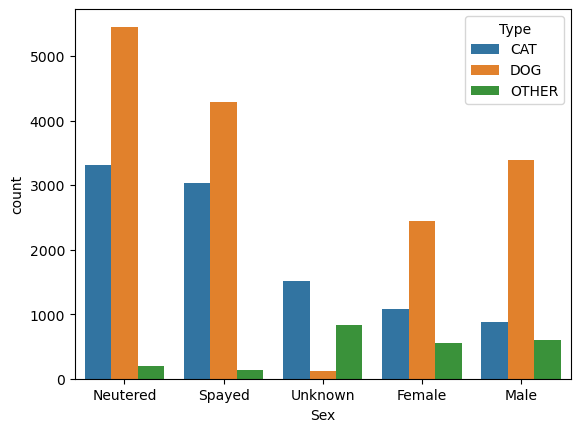

In [30]:
sns.barplot(data=df.groupby("Type").Sex.value_counts().reset_index(), x="Sex", y="count", hue="Type")

<Axes: xlabel='Sex', ylabel='Days_in_Shelter'>

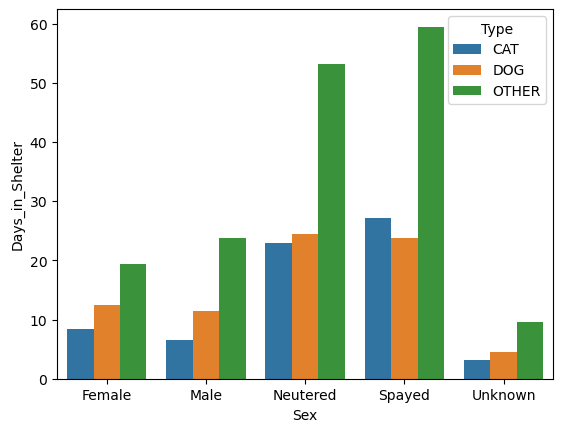

In [34]:
sns.barplot(data=df.groupby(["Type", "Sex"]).Days_in_Shelter.mean().reset_index(), x="Sex", y="Days_in_Shelter", hue="Type")

### Size

In [43]:
df.Size.isna().sum()

36

In [44]:
df[df.Size.isna()]

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count,Has_Name
955,CLIVE,DOG,TERRIER/MIX,TAN,Neutered,NaN,02/01/2015,K17-023215,DS51,A371598,04/21/2017,04/21/2017,0,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1,True
1507,JAKE,DOG,BORDER COLLIE/MIX,BLACK/WHITE,Neutered,NaN,10/01/1999,K14-007399,DS81,A095188,01/19/2014,01/22/2014,3,STRAY,FIELD,RETURN TO OWNER,RETURN TO OWNER,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1,True
2439,DEUCE,DOG,AMERICAN STAFF/PIT BULL,BLACK/WHITE,Spayed,NaN,01/01/2006,K17-025158,TRUCK,A035707,09/02/2017,09/02/2017,0,STRAY,FIELD,RETURN TO OWNER,FLD_MCHIP,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1,True
3715,SALCHICHA,DOG,CHIHUAHUA SH,BROWN,Spayed,NaN,01/01/1998,K14-009006,TX,A037880,05/27/2014,05/28/2014,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,RETURN TO OWNER,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,COUNTY,COUNTY,95446.0,"95446(38.503755, -122.9935)",1,True
3966,ARIES,DOG,MIX,UNKNOWN,Neutered,NaN,03/24/2018,K20-034981,DS84,A380466,01/03/2020,01/04/2020,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,SANTA ROSA,OUT OF COUNTY,83869.0,"83869(47.96731, -116.86786)",1,True
4217,PRESIDENTE,DOG,GERM SHEPHERD,BLACK/BROWN,Male,NaN,NaN,K14-007927,DS60,A024038,03/03/2014,03/04/2014,1,TRANSFER,VET_HOSP,RETURN TO OWNER,RETURN TO OWNER,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1,True
6101,CHLOE,DOG,LABRADOR RETR,YELLOW,Spayed,NaN,06/01/2006,K17-026465,DS52,A034368,11/28/2017,12/05/2017,7,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_LETTER,HEALTHY,HEALTHY,COUNTY,COUNTY,94931.0,"94931(38.3260186, -122.706422)",1,True
6466,WESLEY,DOG,LABRADOR RETR,CHOCOLATE,Neutered,NaN,01/01/2005,K16-017481,DS94,A038536,01/15/2016,01/19/2016,4,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WALKIN,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.443415, -122.69178)",1,True
6485,COSMO,DOG,PARSON RUSS TER,TRICOLOR,Neutered,NaN,NaN,K18-027292,DA28,A010593,02/14/2018,02/15/2018,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1,True
7044,BABY,DOG,CHIHUAHUA SH/MIX,BLACK/WHITE,Spayed,NaN,05/17/2005,K15-013150,DS49,A037924,03/13/2015,03/13/2015,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,*WINDSOR,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1,True


In [47]:
# New category of "UNKNOWN" for size?
df["Size"] = df.Size.fillna("UNKNOWN")

<Axes: xlabel='Size', ylabel='count'>

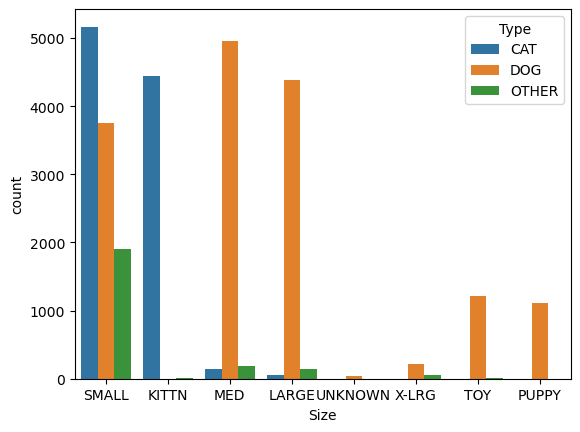

In [48]:
sns.barplot(data=df.groupby("Type").Size.value_counts().reset_index(), x="Size", y="count", hue="Type")

<Axes: xlabel='Size', ylabel='Days_in_Shelter'>

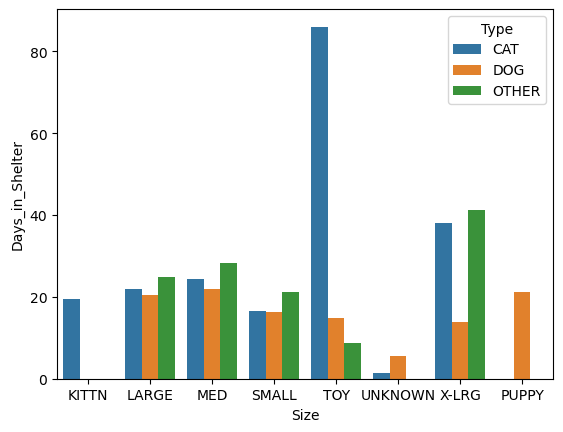

In [50]:
sns.barplot(data=df.groupby(["Type", "Size"]).Days_in_Shelter.mean().reset_index(), x="Size", y="Days_in_Shelter", hue="Type")

### Date of Birth
Feels like date of birth would only be applicable to situations where there is sufficient context to get a date-of-birth, e.g. owner surrender. Interestingly, it is a relatively small percentage of the data that doesn't have a date of birth. Are they being guessed?

In [51]:
df.Date_Of_Birth.isna().sum()

6822

Text(0.5, 1.0, 'Distribution of Birthdays')

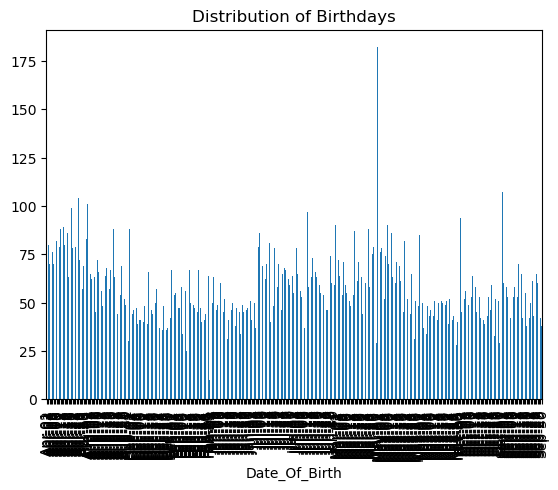

In [65]:
dates = df.Date_Of_Birth.astype("datetime64[ns]")
dates.groupby([dates.dt.strftime("%b-%d")]).count().plot(kind="bar")

plt.title("Distribution of Birthdays")

Interesting outlier, what date is it?

In [64]:
dates_group = dates.groupby([dates.dt.strftime("%b-%d")]).count()
dates_group[dates_group.eq(dates_group.max())]

Date_Of_Birth
May-01    182
Name: Date_Of_Birth, dtype: int64

Doesn't feel like we can use this information, other than maybe creating a `known_birthday` attribute?

### Intake/Outcome Date

In [67]:
df.Intake_Date.isna().sum()

0

In [68]:
df.Outcome_Date.isna().sum()

256

In [73]:
df[df.Outcome_Date.isna()]

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count,Has_Name
9,NaN,OTHER,RABBIT SH,WHITE,Male,SMALL,NaN,K24-047985,CS06,A425471,03/23/2024,NaN,0,STRAY,FLD_STRAY,NaN,NaN,UNKNOWN,NaN,SANTA ROSA,NaN,NaN,NaN,1,False
66,NaN,DOG,FRENCH BULLDOG,BLACK/TAN,Female,SMALL,07/09/2022,K24-047304,NaN,A423720,01/09/2024,NaN,0,STRAY,FIELD,NaN,NaN,UNKNOWN,NaN,SANTA ROSA,NaN,NaN,NaN,1,False
83,*TY,DOG,BORDER COLLIE,TRICOLOR,Male,MED,08/30/2023,K23-046876,FOSTER,A422309,11/21/2023,NaN,0,CONFISCATE,FLD_CRUEL,NaN,NaN,UNKNOWN,NaN,COUNTY,COUNTY,95476.0,"95476(38.288405, -122.464525)",1,True
155,HAZLE,DOG,SIBERIAN HUSKY,RED/WHITE,Neutered,LARGE,08/21/2014,K24-047605,FOSTER,A406399,02/13/2024,NaN,0,ADOPTION RETURN,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN,*SEBASTOPOL,NaN,NaN,NaN,1,True
181,THELMA,DOG,MASTIFF,BROWN/BLACK,Female,X-LRG,11/30/2016,K23-046889,DI104,A422324,11/21/2023,NaN,0,CONFISCATE,FLD_CRUEL,NaN,NaN,UNKNOWN,NaN,COUNTY,COUNTY,95476.0,"95476(38.288405, -122.464525)",1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21970,*RALPHIE,DOG,SIBERIAN HUSKY,GRAY/WHITE,Neutered,MED,09/10/2021,K23-043794,DA48,A415387,02/06/2023,NaN,0,STRAY,FIELD,NaN,NaN,HEALTHY,NaN,SANTA ROSA,NaN,NaN,NaN,1,True
22818,TAFF,DOG,BORDER COLLIE,BLACK/WHITE,Male,MED,06/09/2013,K23-046865,DA28,A314431,11/21/2023,NaN,0,CONFISCATE,FLD_CRUEL,NaN,NaN,UNKNOWN,NaN,COUNTY,COUNTY,95476.0,"95476(38.288405, -122.464525)",1,True
22905,NaN,OTHER,DUCK,WHITE,Female,SMALL,NaN,K23-047008,FAIRGROUND,A422790,12/05/2023,NaN,0,CONFISCATE,FLD_CRUEL,NaN,NaN,UNKNOWN,NaN,COUNTY,COUNTY,95476.0,"95476(38.288405, -122.464525)",1,False
25374,NaN,CAT,DOMESTIC SH,BRN TABBY/BLACK,Male,KITTN,09/10/2023,K23-046396,FOSTER,A421060,10/10/2023,NaN,0,STRAY,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN,SANTA ROSA,COUNTY,95444.0,"95444(38.43463, -122.868295)",1,False


Willing to be all the NaNs on outcome date are the animals still in the shelter at time of data download.

In [72]:
df[df.Outcome_Date.isna()].Intake_Date.astype("datetime64[ns]").min()

Timestamp('2014-04-18 00:00:00')

I stand corrected. Can't imagine an animal being in the shelter that long. But I bet this is the outlier in the length of stay data.

In [75]:
df[df.Days_in_Shelter.eq(df.Days_in_Shelter.max())]

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count,Has_Name
2808,CHARLIE,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,10/27/2014,K18-028173,FREEZER,A319664,05/07/2018,09/27/2021,1239,CONFISCATE,FLD_CORONR,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,COUNTY,94952.0,"94952(38.237, -122.640695)",1,True


I stand corrected again. But there are not any NaNs in the `Days_in_Shelter` variable. How can that be if there isn't an outcome date?

Text(0.5, 1.0, 'Distribution of Intake Dates')

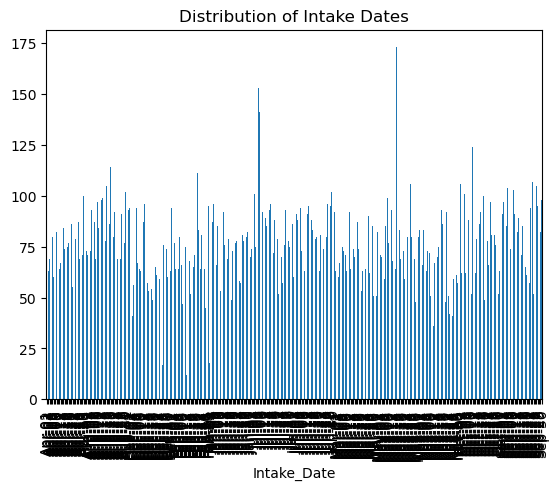

In [78]:
dates = df.Intake_Date.astype("datetime64[ns]")
dates.groupby([dates.dt.strftime("%b-%d")]).count().plot(kind="bar")

plt.title("Distribution of Intake Dates")

Text(0.5, 1.0, 'Distribution of Outcome Dates')

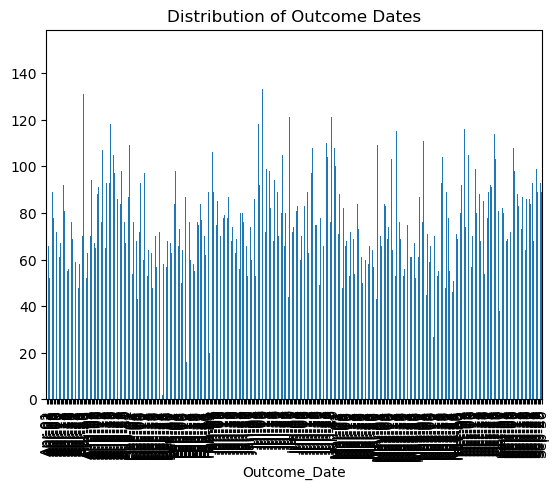

In [79]:
dates = df.Outcome_Date.astype("datetime64[ns]")
dates.groupby([dates.dt.strftime("%b-%d")]).count().plot(kind="bar")

plt.title("Distribution of Outcome Dates")

Do we want to partition the dates into sections and add a categorical `Time_of_Year` feature?

### Intake/Outcome Type

In [76]:
df.Intake_Type.isna().sum()

0

In [77]:
df.Outcome_Type.isna().sum()

262

This outcome type NaN count does not align with the count of NaNs in the outcome date.

In [10]:
df.pivot_table("Count", index="Type", columns=["Intake Type"], aggfunc="count")

Intake Type,ADOPTION RETURN,BORN HERE,CONFISCATE,OS APPT,OWNER SURRENDER,QUARANTINE,STRAY,TRANSFER
Type,,,,,,,,
CAT,136.0,35.0,296.0,5.0,1702.0,127.0,7359.0,161.0
DOG,328.0,6.0,1776.0,NaN,1475.0,466.0,11381.0,259.0
OTHER,4.0,9.0,301.0,NaN,146.0,330.0,1525.0,12.0


In [11]:
df.pivot_table("Count", index="Type", columns=["Outcome Type"], aggfunc="count")

Outcome Type,ADOPTION,DIED,DISPOSAL,ESCAPED/STOLEN,EUTHANIZE,RETURN TO OWNER,RTOS,TRANSFER,VET
Type,,,,,,,,,
CAT,4006.0,103.0,173.0,7.0,1511.0,1247.0,15.0,2684.0,2.0
DOG,3615.0,35.0,36.0,5.0,1731.0,7809.0,45.0,2259.0,1.0
OTHER,473.0,47.0,40.0,3.0,554.0,233.0,3.0,940.0,NaN


<Axes: xlabel='Intake Type', ylabel='Type'>

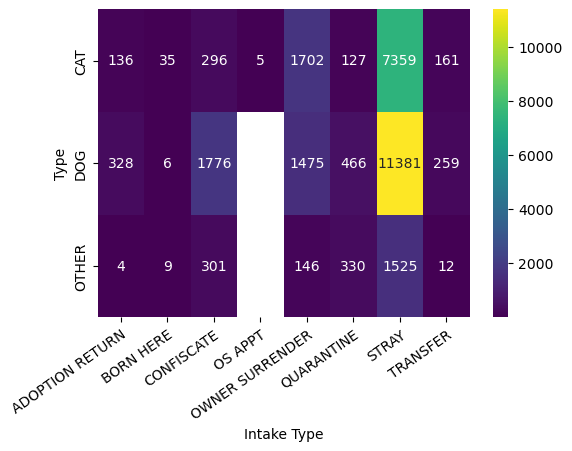

In [12]:
intake_table = df.pivot_table("Count", index="Type", columns=["Intake Type"], aggfunc="count")
fig, ax = plt.subplots(figsize=(6, 4))
heatmap = sns.heatmap(intake_table, annot=True, fmt="g", ax=ax, cmap="viridis")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
heatmap

<Axes: xlabel='Outcome Type', ylabel='Type'>

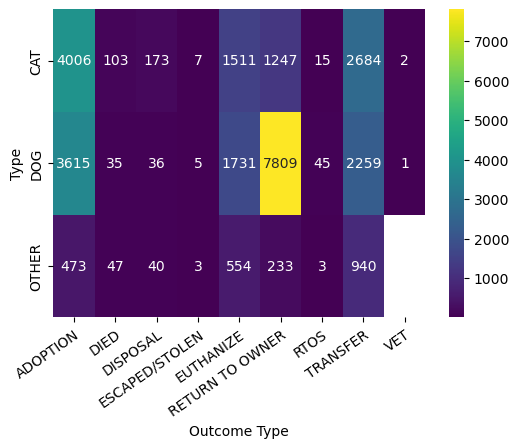

In [13]:
outcome_table = df.pivot_table("Count", index="Type", columns=["Outcome Type"], aggfunc="count")
fig, ax = plt.subplots(figsize=(6, 4))
heatmap = sns.heatmap(outcome_table, annot=True, fmt="g", ax=ax, cmap="viridis")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
heatmap

In [18]:
df[df["Outcome Type"].isin(['RETURN TO OWNER', 'RTOS'])]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
5,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,06/08/2021,K24-047284,DS68,A423685,01/05/2024,01/08/2024,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"93927(36.32153, -121.24627)",1
11,PINTO,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,07/27/2016,K24-047988,DS51,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
13,BELLA,DOG,SHIH TZU,TAN,Female,TOY,05/26/2014,K24-048009,DS51,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",1
16,BUDDY,DOG,SIBERIAN HUSKY,WHITE,Male,MED,NaN,K24-047296,DS81,A423709,01/06/2024,01/09/2024,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1
18,MUNECA,DOG,SIBERIAN HUSKY,WHITE,Female,MED,01/06/2022,K24-047295,DS63,A423708,01/06/2024,01/09/2024,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27827,PEARL,DOG,MALTESE,WHITE,Female,SMALL,01/25/2022,K23-043732,DS94,A415262,01/31/2023,02/14/2023,14,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_LETTER,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1
27831,POSEY,DOG,LABRADOR RETR/MIX,SILVER,Spayed,MED,09/23/2010,K16-017972,DS69,A393222,03/03/2016,03/04/2016,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,*WINDSOR,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1
27832,TEQUILA,DOG,PIT BULL,GRAY/WHITE,Spayed,LARGE,NaN,K17-023055,DS75,A326066,04/07/2017,04/12/2017,5,STRAY,MUN_SHELT,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1
27834,GOLDIE,DOG,CHIHUAHUA SH/MIX,TAN,Spayed,SMALL,05/18/2016,K17-024006,DA31,A352712,06/20/2017,06/21/2017,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95462.0,"95462(38.46819, -123.01142)",1


### Location

In [80]:
df.Location.isna().sum()

4027

In [81]:
df.Location.nunique()

758

These must be field locations, because there is no way there are 758 shelters in Sonoma County.

# TODO:

 I still need to do more in depth analysis on the last half of the data set and think about the feature engineering we need to do/what can be learned from the data. I have a proposed initial cut at the data cleaning process below which captures some of what I've learned thus far.

### Data Cleaning

In [54]:
# Only focusing on dogs and cats for length-of-stay prediction
df = df[df.Type.ne("OTHER")]

# Having a name could mean extra love
df["Has_Name"] = df.Name.notna()

# Make Sex its own feature and fixed a separate feature
df["Fixed"] = df.Sex.isin(["Spayed", "Neutered"])
df["Sex"] = df.Sex.replace("Spayed", "Female").replace("Neutered", "Male")

# Fill missing values in Size
df["Size"] = df.Size.fillna("UNKNOWN")

# There is a discrepancy between the number of NaNs in Outcome Date and Outcome Type, how to resolve?

# Lots of unknown birthdays, maybe just utilize where one is present?
df["Has_Birthday"] = df.Date_Of_Birth.notna()



# Drop unnecessary columns
df.drop(columns=["Name", "Impound_Number", "Kennel_Number", "Animal_ID", "Date_Of_Birth"], inplace=True)
df.reset_index(inplace=True, drop=True)